## Example notebook of using the oyLabCode package

In [33]:
#Change to the oyproc environment
#import sys
#Need lap module
!conda env list

# conda environments:
#
base                     /home/evan/anaconda3
gRNA_Project             /home/evan/anaconda3/envs/gRNA_Project
mws                      /home/evan/anaconda3/envs/mws
oyproc                *  /home/evan/anaconda3/envs/oyproc
pyspots                  /home/evan/anaconda3/envs/pyspots
pyspots_gpu              /home/evan/anaconda3/envs/pyspots_gpu
tf2                      /home/evan/anaconda3/envs/tf2
tfgpu                    /home/evan/anaconda3/envs/tfgpu



In [2]:
%load_ext autoreload
%autoreload 2
%gui qt
%matplotlib qt5

import sys
import os

import numpy as np
import matplotlib.pyplot as plt

### Load Metadata
#### Metadata is back compatible (can load txt files generated by the current Scope class implemented in MATLAB). It first looks for a pickle file and if not it falls back to the legacy txt file. In the future Scope will be implemented in python and metadata will be saved directly as txt and pickle from there. 

#### MD was implemented to allow an easy transition to that model, having a smart append method and saving/loading.

In [62]:
fpath = '/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2'
sys.path.insert(0,'/bigstore/GeneralStorage/Evan/MAPK_FISH/Segmenting Code Combined/oyLabCode')
from oyLabCode import Metadata
MD = Metadata(fpath)

loaded Metadata from pickle file


In [63]:
fpath_2 ='/bigstore/Images2019/Jen/NFkBDynamics/TNF_SpeedvAcc_HSVMOI10_Rpt_2019Jun14'

#### You can call MD to see a human readable table:

In [64]:
MD()

,acq,Position,frame,Channel,Marker,Fluorophore,group,XY,Z,Zindex,Exposure,PixelSize,PlateType,TimestampFrame,TimestampImage,filename,FlatField,Skip,driftTform,root_pth
0,acq_2,B02,1,DeepBlue,Nuclei,Hoechst,B02,"[-83110.0, -3142.0]",12.375,1,30,0.547619,Costar96 (3904),737771.600206,737771.600179,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_DeepBlue_000_...
1,acq_2,B02,1,Green,Prolif,CellTrackerGreen,B02,"[-83110.0, -3142.0]",12.375,1,5,0.547619,Costar96 (3904),737771.600206,737771.600206,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_Green_000_001...
2,acq_2,B02,1,Red,HSV-1,mCherry,B02,"[-83110.0, -3142.0]",12.375,1,115,0.547619,Costar96 (3904),737771.600206,737771.600233,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_Red_000_001.tif
3,acq_2,C02,1,DeepBlue,Nuclei,Hoechst,C02,"[-83111.0, 5880.0]",9.475,1,30,0.547619,Costar96 (3904),737771.600323,737771.600296,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos1/img_C02_000000001_000000000_DeepBlue_000_...
4,acq_2,C02,1,Green,Prolif,CellTrackerGreen,C02,"[-83111.0, 5880.0]",9.475,1,5,0.547619,Costar96 (3904),737771.600323,737771.600322,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos1/img_C02_000000001_000000000_Green_000_001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26095,acq_2,F11,145,Green,Prolif,CellTrackerGreen,F11,"[-1931.0, 32941.0]",30.450,1,5,0.547619,Costar96 (3904),737773.607169,737773.607169,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, -93.0, -146.0, 1]",Pos58/img_F11_000000145_000000144_Green_000_00...
26096,acq_2,F11,145,Red,HSV-1,mCherry,F11,"[-1931.0, 32941.0]",30.450,1,115,0.547619,Costar96 (3904),737773.607169,737773.607196,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, -93.0, -146.0, 1]",Pos58/img_F11_000000145_000000144_Red_000_001.tif
26097,acq_2,G11,145,DeepBlue,Nuclei,Hoechst,G11,"[-1931.0, 41960.0]",16.375,1,30,0.547619,Costar96 (3904),737773.607289,737773.607261,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,None,Pos59/img_G11_000000145_000000144_DeepBlue_000...
26098,acq_2,G11,145,Green,Prolif,CellTrackerGreen,G11,"[-1931.0, 41960.0]",16.375,1,5,0.547619,Costar96 (3904),737773.607289,737773.607286,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,None,Pos59/img_G11_000000145_000000144_Green_000_00...


#### There's a 'unique' method:

In [65]:
MD.unique('Channel')

array(['DeepBlue', 'Green', 'Red'], dtype=object)

#### There are also some simple properties you can get directly:

In [66]:
MD.channels

array(['DeepBlue', 'Green', 'Red'], dtype=object)

In [67]:
print(np.shape(img))

(145, 2048, 2448)


#### Metadata has a stkread method that works as you'd expect:

In [68]:
img = MD.stkread(Position=MD.posnames[5],Channel='DeepBlue')

opening img_G02_000000145_000000144_DeepBlue_000_001.tif

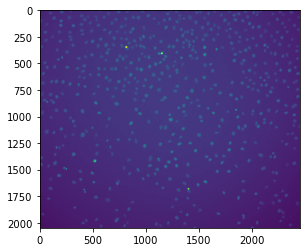

In [69]:
%matplotlib inline
plt.imshow(img[0,:,:])

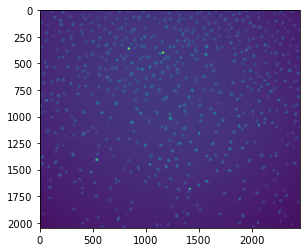

In [11]:
plt.imshow(img[1,:,:])

#### Metadata has a method to calculate the drift/jitter correction between frames in a given position. If you don't provide a **list** of positions it will calculate all the positions. It takes about a minute per position and then saves the MD file:

In [70]:
MD.CalculateDriftCorrection(Position=MD.posnames[5])

opening img_G02_000000145_000000144_DeepBlue_000_001.tif
calculating drift correction for position G02


KeyboardInterrupt: 

**To apply this drift correction to your images, use the register flag for stkread:**

In [71]:
img = MD.stkread(Position=MD.posnames[5],Channel='DeepBlue',register=True)

opening img_G02_000000013_000000012_DeepBlue_000_001.tif

/bigstore/GeneralStorage/Evan/MAPK_FISH/Segmenting Code Combined/oyLabCode/oyLabCode/Metadata/metadata.py:349: UserWarning: No drift correction found for position
  warnings.warn("No drift correction found for position")


opening img_G02_000000145_000000144_DeepBlue_000_001.tif

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(12,15))
plt.imshow(img[16,:,:], cmap="twilight")

#### For presentation we use napari. It's pretty straightforward. Can't really work on remote notebook rn, but hopefully soon. You could have a separate X2Go/NoMachine where you see the images or you could work fully on the server (recommended) or you can try to figure out qt x11 forwarding (I'm gonna try and do that)

In [1]:
import napari
viewer = napari.Viewer()

RuntimeError: napari requires a Qt event loop to run. To create one, try one of the following: 
  - use the `napari.gui_qt()` context manager. See https://github.com/napari/napari/tree/master/examples for usage examples.
  - In IPython or a local Jupyter instance, use the `%gui qt` magic command.
  - Launch IPython with the option `--gui=qt`.
  - (recommended) in your IPython configuration file, add or uncomment the line `c.TerminalIPythonApp.gui = 'qt'`. Then, restart IPython.

In [11]:
viewer.add_image(img, rgb=False)

<Image layer 'img' at 0x7feccc9544c0>

# The Processing module: FrameLbl-> Poslbl-> results


#### FrameLbl - Loads, segments, and retrieves single cell data for a single position and a single timepoint
#### Poslbl - Aggregates all FrameLbls for a specific Position. Deals with tracking.
#### results - Aggregates all Pos labels for a specific experiment

**Before we go on, we need to figure out our segmentation parameters:**

In [12]:
from oyLabCode.Processing.improcutils import segmentation
img = MD.stkread(Position=MD.posnames[3],Channel='DeepBlue', frame=14)
segmentation.test_segmentation_params(img=img, segment_type='watershed')#cellpose_nuclei

opening img_E02_000000014_000000013_DeepBlue_000_001.tif
using _segment_nuclei_watershed


calculating with new parameters


#### starting with FrameLbl:

In [72]:
from oyLabCode.Processing import FrameLbl

FL = FrameLbl(frame=17, MD=MD , Pos=MD.posnames[5], acq = None, register=True ,periring=True, periringsize=5, NucChannel='DeepBlue',cytoplasm=False,CytoChannel='Yellow', segment_type='watershed', cellsize=5, hThresh=0.005)

opening img_G02_000000017_000000016_Red_000_001.tififtifNo drift correction found


opening img_E02_000000017_000000016_Red_000_001.tififtif

#### Calling it will give you some info:

In [73]:
FL()

FrameLbl object for position G02 at frame 17.

The path to the experiment is: 
 /bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2

 697 cells segmented using _segment_nuclei_watershed

Available channels are : DeepBlue, Green, Red.


#### And you can get a bunch of single cell data:

In [74]:
FL.area

0      457
1      720
2      372
3      403
4      543
      ... 
692    374
693    430
694    340
695    510
696    379
Name: area, Length: 697, dtype: int64

In [75]:
FL.ninetyint('Green')

0      0.071014
1      0.070306
2      0.070038
3      0.070770
4      0.071014
         ...   
692    0.072113
693    0.071991
694    0.071747
695    0.069061
696    0.071259
Name: 90th_Green, Length: 697, dtype: float64

In [76]:
FL.mean('DeepBlue',periring=True)

0      0.286861
1      0.280533
2      0.261079
3      0.285686
4      0.272621
         ...   
692    0.197100
693    0.176302
694    0.196822
695    0.168827
696    0.177199
Name: mean_DeepBlue_periring, Length: 697, dtype: float64

In [106]:
FL.mean('DeepBlue')

0      0.405368
1      0.312271
2      0.259110
3      0.271210
4      0.268339
         ...   
692    0.251338
693    0.199639
694    0.274669
695    0.232360
696    0.220669
Name: mean_DeepBlue, Length: 697, dtype: float64

**You can visualize the final segmentation with scattershow**

loaded Metadata from pickle file
opening img_G02_000000017_000000016_DeepBlue_000_001.tif

/bigstore/GeneralStorage/Evan/MAPK_FISH/Segmenting Code Combined/oyLabCode/oyLabCode/Metadata/metadata.py:349: UserWarning: No drift correction found for position
  warnings.warn("No drift correction found for position")


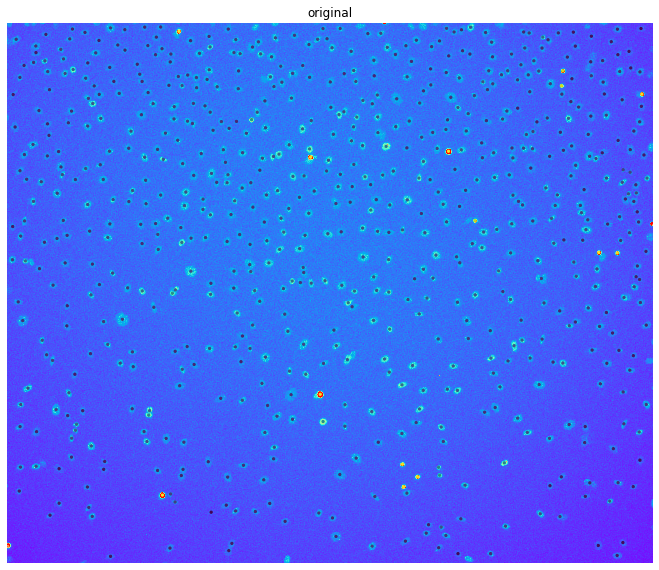

In [81]:
FL.scattershow()

In [88]:
MD()

,acq,Position,frame,Channel,Marker,Fluorophore,group,XY,Z,Zindex,Exposure,PixelSize,PlateType,TimestampFrame,TimestampImage,filename,FlatField,Skip,driftTform,root_pth
0,acq_2,B02,1,DeepBlue,Nuclei,Hoechst,B02,"[-83110.0, -3142.0]",12.375,1,30,0.547619,Costar96 (3904),737771.600206,737771.600179,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_DeepBlue_000_...
1,acq_2,B02,1,Green,Prolif,CellTrackerGreen,B02,"[-83110.0, -3142.0]",12.375,1,5,0.547619,Costar96 (3904),737771.600206,737771.600206,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_Green_000_001...
2,acq_2,B02,1,Red,HSV-1,mCherry,B02,"[-83110.0, -3142.0]",12.375,1,115,0.547619,Costar96 (3904),737771.600206,737771.600233,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos0/img_B02_000000001_000000000_Red_000_001.tif
3,acq_2,C02,1,DeepBlue,Nuclei,Hoechst,C02,"[-83111.0, 5880.0]",9.475,1,30,0.547619,Costar96 (3904),737771.600323,737771.600296,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos1/img_C02_000000001_000000000_DeepBlue_000_...
4,acq_2,C02,1,Green,Prolif,CellTrackerGreen,C02,"[-83111.0, 5880.0]",9.475,1,5,0.547619,Costar96 (3904),737771.600323,737771.600322,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, 0.0, 0.0, 1]",Pos1/img_C02_000000001_000000000_Green_000_001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26095,acq_2,F11,145,Green,Prolif,CellTrackerGreen,F11,"[-1931.0, 32941.0]",30.450,1,5,0.547619,Costar96 (3904),737773.607169,737773.607169,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, -93.0, -146.0, 1]",Pos58/img_F11_000000145_000000144_Green_000_00...
26096,acq_2,F11,145,Red,HSV-1,mCherry,F11,"[-1931.0, 32941.0]",30.450,1,115,0.547619,Costar96 (3904),737773.607169,737773.607196,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,"[1, 0, 0, 0, 1, 0, -93.0, -146.0, 1]",Pos58/img_F11_000000145_000000144_Red_000_001.tif
26097,acq_2,G11,145,DeepBlue,Nuclei,Hoechst,G11,"[-1931.0, 41960.0]",16.375,1,30,0.547619,Costar96 (3904),737773.607289,737773.607261,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,None,Pos59/img_G11_000000145_000000144_DeepBlue_000...
26098,acq_2,G11,145,Green,Prolif,CellTrackerGreen,G11,"[-1931.0, 41960.0]",16.375,1,5,0.547619,Costar96 (3904),737773.607289,737773.607286,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,NaN,1,None,Pos59/img_G11_000000145_000000144_Green_000_00...


## Testing Evan's Segmentation Code

In [95]:
sys.path.insert(0,'/bigstore/GeneralStorage/Evan/MAPK_FISH/Segmenting Code Combined/oyLabCode/evanLabCode')

import segmentation

In [108]:
#Feed the same image data to segmentation
# Position G2 Frame 17 DeepBlue
#FL = FrameLbl(frame=17, MD=MD , Pos=MD.posnames[5], acq = None, register=True ,periring=True, periringsize=5, NucChannel='DeepBlue'
#,cytoplasm=False,CytoChannel='Yellow', segment_type='watershed', cellsize=5, hThresh=0.005)
nuc_img = MD.stkread(Position=MD.posnames[5],Channel='DeepBlue')[16]
cyto_img = MD.stkread(Position=MD.posnames[5],Channel='Green')[16]

opening img_G02_000000145_000000144_Green_000_001.tiftif[[0.05905151 0.06881714 0.07516479 ... 0.06954956 0.05319214 0.06539917]
 [0.06417847 0.06124878 0.06686401 ... 0.05612183 0.06588745 0.06027222]
 [0.06100464 0.06442261 0.06588745 ... 0.05905151 0.0710144  0.06491089]
 ...
 [0.07321167 0.06173706 0.06295776 ... 0.06271362 0.06466675 0.0619812 ]
 [0.06735229 0.06686401 0.05661011 ... 0.06295776 0.06344604 0.06686401]
 [0.05807495 0.06881714 0.06222534 ... 0.05929565 0.06271362 0.05856323]]


In [99]:
#DeepBlue (Nuclear)
nuc_img = nuc_img.reshape(nuc_img.shape[0], nuc_img.shape[1], -1) 
wvt_nuclear = label_wvt(nuc_img)
watershed_wvt_nuclear = watershed_wvt(nuc_img,wvt_nuclear)
print(np.shape(watershed_wvt_nuclear))

(2048, 2448, 1)


In [ ]:
#Yellow (Cyto)
#def features(watershed_wvt_img, well_img):
#well_arr_cyto = metadata.stkread(Channel=channel, Position=position)[:,:,keep_frames]
#well_arr_cytos[marker] = well_arr_nuclear.reshape(well_arr_cyto.shape[0], well_arr_cyto.shape[1], -1)
cyto_img = cyto_img.reshape(cyto_img.shape[0], cyto_img.shape[1], -1) 
cyto_feature = features(watershed_wvt_nuclear, cyto_img)


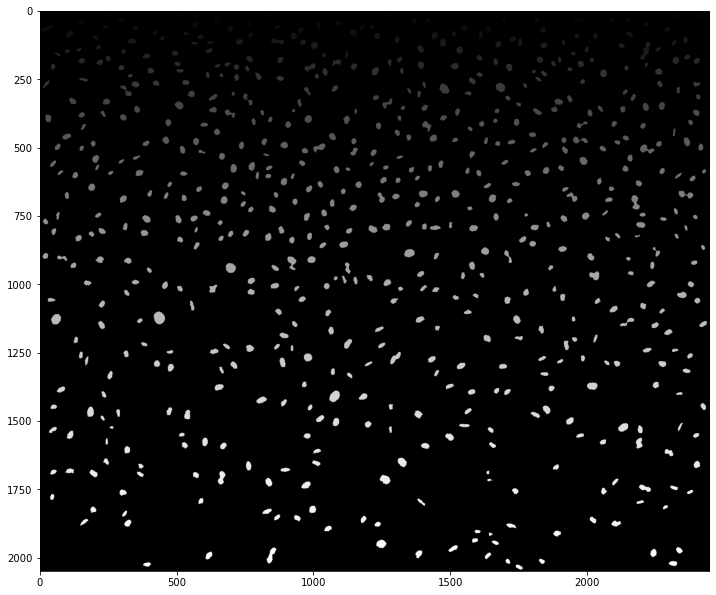

In [120]:
fig = plt.figure(figsize=(12,15))
plt.imshow(nuc_img, cmap="rainbow")

from segmentation import segment_image
test_img = segment_image(nuc_img)
plt.imshow(watershed_wvt_nuclear, cmap="gray")
# create_nuc_cyto_visualization(well_arr, nuc_label_img, all_cyto_coords):


In [133]:
FL_test_evan = FrameLbl(frame=17, MD=MD , Pos=MD.posnames[5], acq = None, register=True ,periring=True, periringsize=5, NucChannel='DeepBlue',cytoplasm=False,CytoChannel='Yellow', segment_type='evan', cellsize=5, hThresh=0.005)

opening img_G02_000000017_000000016_Red_000_001.tififtifNo drift correction found


loaded Metadata from pickle file
opening img_G02_000000017_000000016_DeepBlue_000_001.tif

/bigstore/GeneralStorage/Evan/MAPK_FISH/Segmenting Code Combined/oyLabCode/oyLabCode/Metadata/metadata.py:349: UserWarning: No drift correction found for position
  warnings.warn("No drift correction found for position")


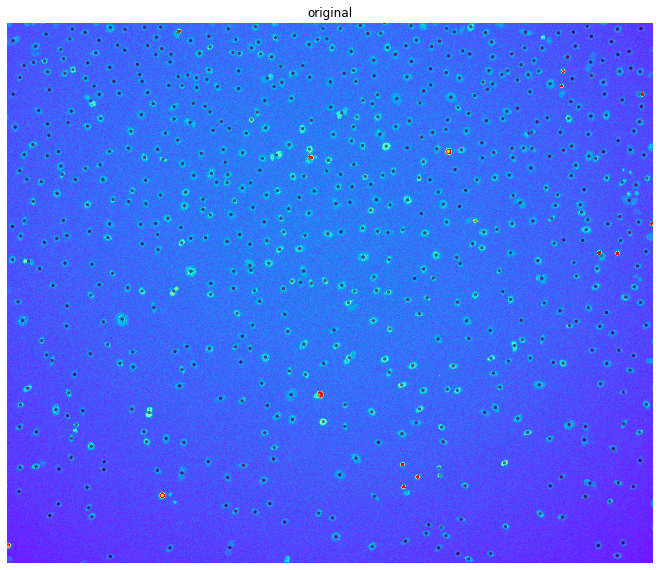

In [137]:
FL_test_evan.scattershow()

#### Next, we take individual frames from the same position and aggregate

In [138]:
from oyLabCode.Processing import PosLbl

P1 = PosLbl(Pos=MD.posnames[5], MD=MD ,pth=None, threads=32, segment_type='watershed', cellsize=5,hThresh=0.005)


  0%|                                                                                                                                                | 0/145 [00:00<?, ?it/s]


PicklingError: Can't pickle <class 'oyLabCode.Processing.FrameLbl.FrameLbl'>: it's not the same object as oyLabCode.Processing.FrameLbl.FrameLbl

In [76]:
P1()

PosLbl object for position B02.

The path to the experiment is: 
 /bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2

 145 frames processed.

Available channels are : DeepBlue, Green, Red.


#### As before, all parameters are addressable from PosLbl:

In [30]:
P1.ninetyint('Red')[30]

0       0.072479
1       0.072406
2       0.072260
3       0.072479
4       0.071747
          ...   
1148    0.073212
1149    0.072723
1150    0.070746
1151    0.072821
1152    0.073944
Name: 90th_Red, Length: 1153, dtype: float64

#### Tracking is done in 2 steps, linking and closing gaps as before. Both steps use Jonker-Volgenant lap algorithm:

In [70]:
P1.trackcells(ch='Red')

linking frame 143
Finished connecting tracks


#### Now we can look at a single cell over time

In [107]:
plt.plot(P1.track(1).ninetyint('Red'))

NameError: name 'P1' is not defined

### PosLabels are aggregated in a results object:

In [13]:
from oyLabCode.Processing import results
R = results(MD=MD)

In [14]:
R()

Results object for path to experiment in path: 
 /bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2

Available channels are : DeepBlue, Green, Red.

Positions already segmented are : 

Available positions : B02, C02, D02, E02, F02, G02, B03, C03, D03, E03, F03, G03, B04, C04, D04, E04, F04, G04, B05, C05, D05, E05, F05, G05, B06, C06, D06, E06, F06, G06, B07, C07, D07, E07, F07, G07, B08, C08, D08, E08, F08, G08, B09, C09, D09, E09, F09, G09, B10, C10, D10, E10, F10, G10, B11, C11, D11, E11, F11, G11.

Available frames : , 145.


In [ ]:
R.setPosLbls(MD=MD,Position=MD.posnames[7],NucChannel='DeepBlue',segment_type='cellpose_nuclei', threads=16)


Processing position C03


 88%|████████▊ | 128/145 [29:50<06:59, 24.68s/it] 

In [21]:
R()

Results object for path to experiment in path: 
 /bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2

Available channels are : DeepBlue, Green, Red.

Positions already segmented are : C03

Available positions : B02, C02, D02, E02, F02, G02, B03, C03, D03, E03, F03, G03, B04, C04, D04, E04, F04, G04, B05, C05, D05, E05, F05, G05, B06, C06, D06, E06, F06, G06, B07, C07, D07, E07, F07, G07, B08, C08, D08, E08, F08, G08, B09, C09, D09, E09, F09, G09, B10, C10, D10, E10, F10, G10, B11, C11, D11, E11, F11, G11.

Available frames : 145.


In [22]:
R.PosLbls[MD.posnames[7]].area

0      208
1      468
2      160
3      436
4      248
      ... 
613    244
614    272
615    260
616    288
617    112
Name: area, Length: 618, dtype: int64

In [35]:
R.PosLbls[MD.posnames[7]].trackcells(ch='DeepBlue')

linking frame 143
Finished connecting tracks


In [ ]:
R.save()